In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3176
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2867
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2567
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2289
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2027
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1743
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1511
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1265
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1045
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0829
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0456
Epoch 13/100
5/5 [==============================] - 0s 2ms/st

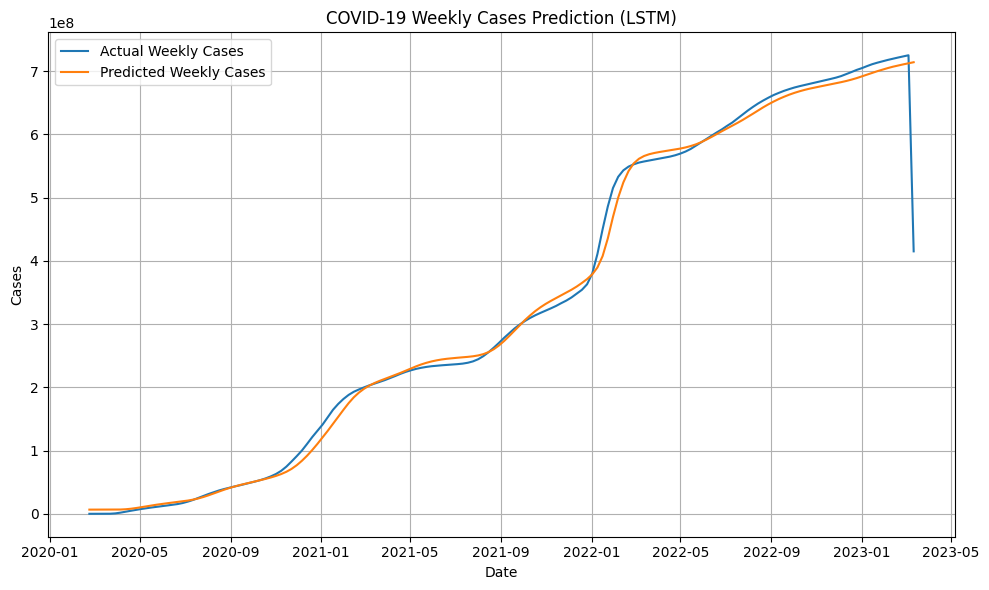

In [6]:
# Load your CSV file
df = pd.read_csv("cleaned_US_cases_and_deaths.csv", parse_dates=['Date'])

# Simulated example - replace this with your actual data and columns

weekly_df = df.groupby(pd.Grouper(key='Date', freq='W'))['Cases'].sum().reset_index()

# Normalize case values
scaler = MinMaxScaler()
cases_scaled = scaler.fit_transform(weekly_df[['Cases']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 4  # Number of weeks to look back
X, y = create_sequences(cases_scaled, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X, y, epochs=100, verbose=1)

# Predict
y_pred = model.predict(X)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_true_inverse = scaler.inverse_transform(y)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(weekly_df['Date'][seq_length:], y_true_inverse, label='Actual Weekly Cases')
plt.plot(weekly_df['Date'][seq_length:], y_pred_inverse, label='Predicted Weekly Cases')
plt.title("COVID-19 Weekly Cases Prediction (LSTM)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.4325
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3890
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3451
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3045
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2619
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2210
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1775
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1369
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0958
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 13/100
5/5 [==============================] - 0s 2ms/st

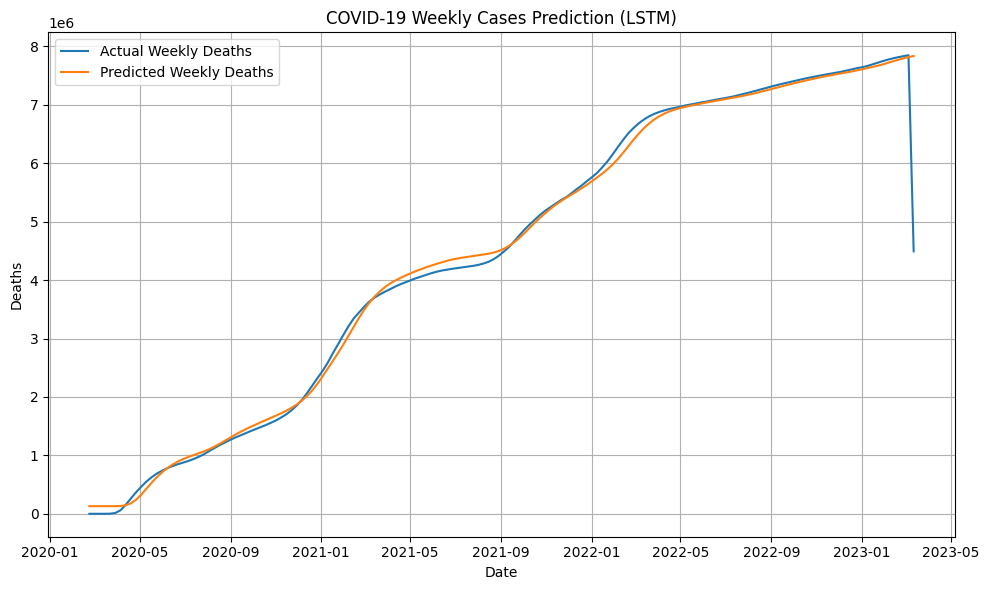

In [8]:
# Load your CSV file
df = pd.read_csv("cleaned_US_cases_and_deaths.csv", parse_dates=['Date'])

# Simulated example - replace this with your actual data and columns

weekly_death_df = df.groupby(pd.Grouper(key='Date', freq='W'))['Deaths'].sum().reset_index()

# Normalize case values
scaler = MinMaxScaler()
cases_scaled = scaler.fit_transform(weekly_death_df[['Deaths']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 4  # Number of weeks to look back
X, y = create_sequences(cases_scaled, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X, y, epochs=100, verbose=1)

# Predict
y_pred = model.predict(X)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_true_inverse = scaler.inverse_transform(y)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(weekly_death_df['Date'][seq_length:], y_true_inverse, label='Actual Weekly Deaths')
plt.plot(weekly_death_df['Date'][seq_length:], y_pred_inverse, label='Predicted Weekly Deaths')
plt.title("COVID-19 Weekly Cases Prediction (LSTM)")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
